#  Interpolation with equispaced nodes

In [1]:
using FundamentalsNumericalComputation

We choose a function over the interval $[0,1]$. 

In [4]:
f = x -> sin(exp(2*x));

Here is a graph of $f$ and its polynomial interpolant using 7 equally spaced nodes.

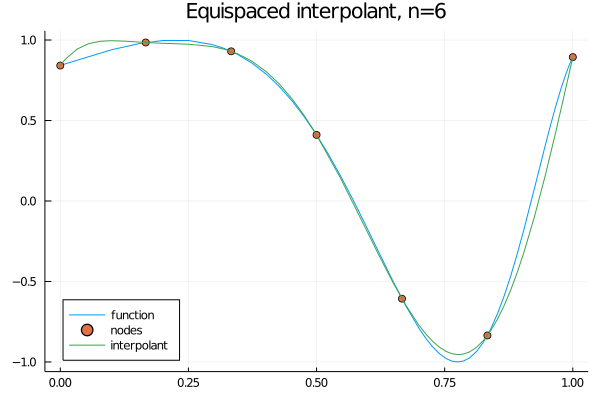

In [8]:
plot(f,0,1,label="function",legend=:bottomleft)
t = OffsetArray((0:6)/6,0:6)
y = f.(t)
scatter!(t,y,label="nodes")

p = FNC.polyinterp(t,y)
plot!(p,0,1,label="interpolant",title="Equispaced interpolant, n=6")

This looks pretty good. We want to track the behavior of the error as $n$ increases. We will measure the error by taking the max-norm over a sampling the interpolant at a large number of points.

In [9]:
n = (5:5:60)
err = zeros(size(n))
x = range(0,stop=1,length=1001)      # for measuring error
for (k,n) = enumerate(n) 
  t = OffsetArray((0:n)/n,0:n)       # equally spaced nodes
  y = f.(t)                          # interpolation data
  p = FNC.polyinterp(t,y)
  err[k] = maximum( @. abs(f(x)-p(x)) )
end

pretty_table((n=n,error=err),nosubheader=true)

┌────┬─────────────┐
│  n │       error │
├────┼─────────────┤
│  5 │    0.428092 │
│ 10 │   0.0154109 │
│ 15 │ 0.000282644 │
│ 20 │  3.48036e-6 │
│ 25 │  2.97372e-8 │
│ 30 │  5.1323e-10 │
│ 35 │   1.3117e-8 │
│ 40 │   5.7433e-7 │
│ 45 │  2.07534e-5 │
│ 50 │ 0.000393224 │
│ 55 │   0.0131631 │
│ 60 │    0.278513 │
└────┴─────────────┘


You can see that the error initially decreases as one would expect, but then begins to grow. Both phases occur at rates that are exponential in $n$, i.e., $O(K^n$) for a constant $K$, appearing linear on a semi-log plot.

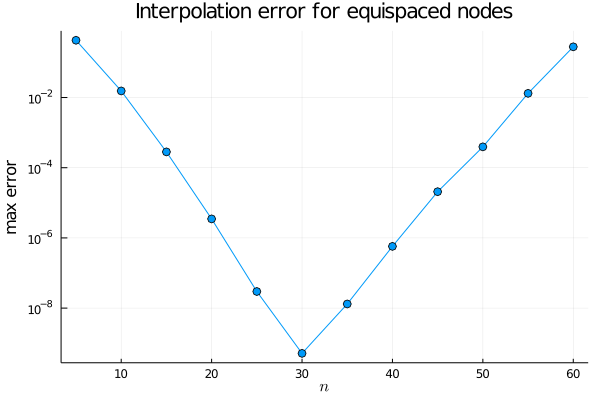

In [10]:
plot(n,err,m=:o,label="", 
    xaxis=(L"n"),yaxis=(:log10,"max error"),
    title="Interpolation error for equispaced nodes")